In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Load, process and visualize the data

In [3]:
# z_test = pd.read_csv('../data/trajectories/steady_state/steady_state_trajectories.csv')
z_test = pd.read_csv('../data/trajectories/steady_state/steady_state.csv')

In [4]:
z_test.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,0.110813,-0.098719,-0.106507,0.098948,-0.109066,-0.203788,0.103035,-0.109740,-0.318940
1,0.102085,-0.103740,-0.110747,0.097198,-0.103155,-0.202704,0.103760,-0.094819,-0.316326
2,0.103728,-0.101149,-0.108535,0.099629,-0.095347,-0.196027,0.103892,-0.050099,-0.293903
3,0.102076,-0.104318,-0.111088,0.099421,-0.109201,-0.203365,0.108772,-0.114708,-0.316528
4,0.102741,-0.102228,-0.110752,0.098546,-0.099367,-0.203025,0.105377,-0.093680,-0.316470


In [5]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

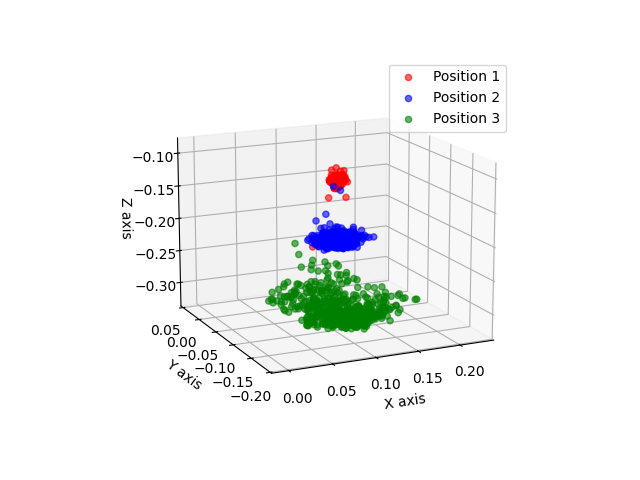

In [16]:
plt.close('all')

# Enable the ipympl backend for interactive plots
%matplotlib widget

# z_dataframes = [z_25, z_30, z_uni]
z_dataframes = [z_test]
position_colors = ['r', 'b', 'g']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for z_df in z_dataframes:
    x1, y1, z1 = z_df['x1'], z_df['y1'], z_df['z1']
    x2, y2, z2 = z_df['x2'], z_df['y2'], z_df['z2']
    x3, y3, z3 = z_df['x3'], z_df['y3'], z_df['z3']
    ax.scatter(x1, y1, z1, color=position_colors[0], label='Position 1', alpha=0.6)
    ax.scatter(x2, y2, z2, color=position_colors[1], label='Position 2', alpha=0.6)
    ax.scatter(x3, y3, z3, color=position_colors[2], label='Position 3', alpha=0.6)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# Adjust the view so that y-axis is upwards
ax.view_init(elev=15, azim=245)
ax.legend()
set_axes_equal(ax)